# Experimento A/B en página de inicio

El objetivo de este proyecto es evaluar un **experimento A/B** realizado en una página de inicio (landing page) con versiónes **A y B** para apoyar una **decisión de negocio basada en datos**.

---

El archivo `landing_experiment.csv` contiene información de usuarios expuestos a dos versiones de la página de inicio (landing page) dentro del experimento A/B. Incluye región, dispositivo, fuente de tráfico, tipo de usuario, conversión y gasto.

El análisis sigue una lógica clara y progresiva:

1. 🔍 Explorar y validar los datos.

2. 💰 Comparar el **gasto promedio** por usuario entre la página A y B.

3. 🎯 Comparar la **tasa de conversión** entre la página A y B.

4. 🌐 Revisar **la relación entre la fuente de tráfico y la conversión**.

5. 👤 Revisar **la relación entre el tipo de usuario y la conversión**.

6. 📈 **Visualizar los resultados**: Respalda tus conclusiones mediante gráficos claros.

Se aplican **puebas estadísticas apropiados** para comparar las páginas y **recomendar qué versión es mejor**, justificando la decisión con datos.

## 🧩 Paso 1: Cargar y validar los datos

### 1.1 Carga de datos y vista rápida

In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

In [2]:
# cargar archivo
df = pd.read_csv('/datasets/landing_experiment.csv')

**Vista previa e información general del conjunto de datos**

In [3]:
# mostrar las primeras 5 filas
df.head(5)

,user_id,date,landing,region,dispositivo,traffic_source,user_type,converted,gasto
0,26f3052e-8500-44ea-8fff-06de65258abb,2026-01-01,A,Norte,Mobile,Email,Recurrente,1,38.08
1,92378c09-4bbf-40c7-945e-82b84f392d22,2026-01-23,A,Occidente,Mobile,Organic,Nuevo,0,0.00
2,a4397360-40e5-45d6-a7ff-dcb4da2c9a1f,2026-01-01,B,Centro,Mobile,Organic,Nuevo,0,0.00
3,7ca3a26f-1e6c-44aa-9b09-b8cb01112956,2026-01-22,A,Centro,Mobile,Ads,Nuevo,0,0.00
4,8dc9593b-5b9c-479d-848b-a99493920419,2026-01-16,A,Sur,Mobile,Organic,Nuevo,0,0.00


In [4]:
# información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         40000 non-null  object 
 1   date            40000 non-null  object 
 2   landing         40000 non-null  object 
 3   region          40000 non-null  object 
 4   dispositivo     40000 non-null  object 
 5   traffic_source  40000 non-null  object 
 6   user_type       40000 non-null  object 
 7   converted       40000 non-null  int64  
 8   gasto           40000 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 2.7+ MB


**Observacion del Analista: El dataset no tiene valores ausentes y no hay error en el tipos de dato en las columnas.**

**Descripción del conjunto de datos**

El dataset contiene las siguientes columnas:

- `user_id` — Identificador único del usuario
- `date` — Fecha en la que el usuario fue expuesto a la página
- `landing` — Versión de la página mostrada al usuario
- `region` — Región geográfica del usuario
- `dispositivo` — Tipo de dispositivo utilizado por el usuario
- `traffic_source` — Canal por el que llegó el usuario
- `user_type` — Tipo de usuario según historial previo
- `converted` — Indica si el usuario realizó una conversión
- `gasto` — Monto gastado por el usuario (0 si no convirtió)

### 1.2 Análisis exploratorio y revisión de calidad de datos

Se identifican las variables clave del experimento A/B y se valida que estén bien definidas, completas y que sean consistentes.


 **Variable `user_id`**  
 Verificar usuarios únicos

In [5]:
print("Usuarios únicos:", df['user_id'].nunique())

Usuarios únicos: 40000


 **Variable `date`**  
Explorar rango de fechas

In [6]:
# Resumen estadístico
df["date"].describe()

count          40000
unique            28
top       2026-01-24
freq            1512
Name: date, dtype: object

In [7]:
# Identificar rango temporal del experimento
print("Fecha mínima:", df["date"].min())
print("Fecha máxima:", df["date"].max())

Fecha mínima: 2026-01-01
Fecha máxima: 2026-01-28


**Variable `gasto` (numérica)**

In [8]:
# Resumen estadístico
df[df['converted'] == 1]['gasto'].describe()

count    5706.000000
mean       65.373668
std        30.896545
min        12.120000
25%        42.950000
50%        59.860000
75%        80.370000
max       303.680000
Name: gasto, dtype: float64

In [9]:
# Resumen estadístico de usuarios que se convirtieron
df['converted'].describe()

count    40000.00000
mean         0.14265
std          0.34972
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: converted, dtype: float64

 **Variables categóricas**  
 Verificar categorías esperadas del experimento ( A y B).

In [10]:
# Explorar variables categóricas y cómo se distribuyen
print("\nConteo de categorías:")
#print(#completa el código)


Conteo de categorías:


In [11]:
variables_categoricas=['landing', 'region', 'dispositivo', 'traffic_source', 'user_type']

for variable in variables_categoricas:
    print(f"📊 {variable.upper()}:")
    print(df[variable].value_counts())
    print(f"Porcentajes:")
    print(df[variable].value_counts(normalize=True) * 100)
    print("-" * 50)

📊 LANDING:
B    20018
A    19982
Name: landing, dtype: int64
Porcentajes:
B    50.045
A    49.955
Name: landing, dtype: float64
--------------------------------------------------
📊 REGION:
Norte        11166
Centro        9613
Sur           8039
Occidente     6398
Oriente       4784
Name: region, dtype: int64
Porcentajes:
Norte        27.9150
Centro       24.0325
Sur          20.0975
Occidente    15.9950
Oriente      11.9600
Name: region, dtype: float64
--------------------------------------------------
📊 DISPOSITIVO:
Mobile     24829
Desktop    15171
Name: dispositivo, dtype: int64
Porcentajes:
Mobile     62.0725
Desktop    37.9275
Name: dispositivo, dtype: float64
--------------------------------------------------
📊 TRAFFIC_SOURCE:
Organic     17987
Ads         11935
Email        6123
Referral     3955
Name: traffic_source, dtype: int64
Porcentajes:
Organic     44.9675
Ads         29.8375
Email       15.3075
Referral     9.8875
Name: traffic_source, dtype: float64
-------------------

**Observacion del Analista: Todas las columnas tienen valores esperados.**

## 💰 Paso 2: Comparar el gasto promedio por usuario (página A vs B)

Se evalua si existen diferencias estadísticamente significativas en el gasto promedio de los **usuarios que se convirtieron en clientes** entre la página A y la página B, para identificar qué versión genera **mayor valor económico** para el negocio.


In [12]:
# Gasto por versión
gasto_A = df[(df['converted']==1) & (df['landing']=='A')]['gasto']
gasto_B = df[(df['converted']==1) & (df['landing']=='B')]['gasto']

# Verificar cantidad de datos que tiene cada grupo
len(gasto_A), len(gasto_B)

(2512, 3194)

### Prueba t de Student (Variable Numerica)

**Hipótesis:**
- **Hipótesis nula (H₀):** No Hay diferencias entre paginas. 
- **Hipótesis alternativa (H₁):** Hay una diferencia estadisticamente significativa de una diferencia

In [13]:
# Aplicar prueba
#Comprovacion con Levene
from scipy.stats import levene

# Ejecutar prueba de Levene y mostrar resultados
l_stat, p_value_var = levene(gasto_A, gasto_B)
print(f"Estadístico de Levene: {l_stat}")
print(f"Valor p: {p_value_var}")

alpha = 0.05  # umbral de significancia
if p_value_var < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de varianzas diferentes (equal_var=False).")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de varianzas diferentes (equal_var=True).")


Estadístico de Levene: 29.17646453202917
Valor p: 6.875301988016449e-08
Rechazamos la hipótesis nula: hay evidencia de varianzas diferentes (equal_var=False).


In [14]:
#Como se rechaza la hipotesis nula y hay varianza podemos implementart la Prueba t de Student
t_stat, p_value = ttest_ind(gasto_A , gasto_B, equal_var=False)

# Visualizar resultados
print(f"Estadístico : {t_stat}")
print(f"Valor p: {p_value}")

alpha = 0.05  # umbral de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de varianzas diferentes.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de varianzas diferentes.")

Estadístico : -9.48101092267275
Valor p: 3.627602231521493e-21
Rechazamos la hipótesis nula: hay evidencia de varianzas diferentes.


In [15]:
#Diferencias
media_A = gasto_A.mean()
media_B = gasto_B.mean()
print('La media para la pagina A: ', media_A)
print('La media para la pagina B: ', media_B)
print('La diferencia es de: ', media_B - media_A)

La media para la pagina A:  61.0865724522293
La media para la pagina B:  68.74536005009392
La diferencia es de:  7.658787597864624


### 📝 Conclusión e interpretación

**Decisión:**  
Se rechaza la Hipotesis nula

**Interpretación de negocio:**  
Con base en la prueba t, encontramos evidencia estadísticamente significativa de que el gasto promedio difiere entre las dos páginas, siendo la página B la que presenta un gasto promedio significativamente mayor. Por tanto, se recomienda implementar la página B.

---


## 📈 Paso 3: Comparar la tasa de conversión entre la página A y B

Se evalua si existen difere]ncias estadísticamente significativas en la **tasa de conversión** entre la página A y B, con el fin de identificar qué versión genera **mayor número de usuarios convertidos**.

### Prueba Z (Comparacion de proporciones)

**Hipótesis:**
- **Hipótesis nula (H₀):** No hay diferencia entre la pagina A y B
- **Hipótesis alternativa (H₁):** Se rechaza la Hipotesis nula: Hay evidencia de una diferencia

In [16]:
# Número de usuarios convertidos por página
conversiones = df.groupby('landing')['converted'].sum()

# Total de usuarios por página
totales = df.groupby('landing')['converted'].count()

print("Usuarios convertidos por página:\n", conversiones)
print("\nTotal de usuarios por página:\n", totales)

Usuarios convertidos por página:
 landing
A    2512
B    3194
Name: converted, dtype: int64

Total de usuarios por página:
 landing
A    19982
B    20018
Name: converted, dtype: int64


In [17]:
#Aplicar formato lista para la prueba
exitos = [conversiones['A'], conversiones['B']]
observaciones = [totales['A'], totales['B']]

In [18]:
# Aplicar prueba
z_stat, p_value_z = proportions_ztest(exitos, observaciones)

# Visualizar resultados
print(f"Estadístico z: {z_stat}")
print(f"Valor p: {p_value_z}")

alpha = 0.05  # umbral de significancia
if p_value_z < alpha:
    print("Rechazamos la hipótesis nula:hay evidencia de una diferencia.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de una diferencia.")

Estadístico z: -9.677362674655983
Valor p: 3.7629765627523803e-22
Rechazamos la hipótesis nula:hay evidencia de una diferencia.


In [19]:
# Obtener tasa o porcentaje de éxito
tasa_A = exitos[0] / observaciones[0]
tasa_B = exitos[1] / observaciones[1]

print(f"Tasa de conversión página A: {tasa_A:.2%}")
print(f"Tasa de conversión página B: {tasa_B:.2%}")

# Interpretar dirección de resultados
if tasa_A > tasa_B:
    print(f"\nLa página A tiene una mayor tasa de conversión ({tasa_A - tasa_B:.2%}).")
elif tasa_B > tasa_A:
    print(f"\nLa página B tiene una mayor tasa de conversión ({tasa_B - tasa_A:.2%})")
else:
    print("\nAmbas páginas tienen la misma tasa de conversión.")

Tasa de conversión página A: 12.57%
Tasa de conversión página B: 15.96%

La página B tiene una mayor tasa de conversión (3.38%)


### 📝 Conclusión e interpretación

**Decisión:**  
Se rechaza la hipótesis nula: Hay evidencia de una diferencia

**Interpretación de negocio:**  
Con base en un z-tests para proporciones, se encontró evidencia estadisticamente significativa que la tasa de conversion difiere entre las paginas A y B. 
La página B presenta una tasa de conversión de 15.96%, frente a 12.57% de la página A, lo que representa una diferencia absoluta de 3.38 puntos porcentuales y una mejora relativa de aproximadamente 26.9% respecto a la página A.

## 🔗 Paso 4: Revisar la relación entre la fuente de tráfico y la conversión

Se analiza si existe una **asociación estadísticamente significativa** entre la **fuente de tráfico** (`traffic_source`) y la **conversión** (`converted`), para identificar qué canales generan más conversiones.

### Prueba Chi-cuadrada

**Hipótesis:**
- **Hipótesis nula (H₀):** No hay evidencia de asociacion entre variables
- **Hipótesis alternativa (H₁):** Hay evidencia de asociacion ente **traffic_source** y **converted**

In [20]:
#tabla de contingencia
tabla_tr_cn=pd.crosstab(df['traffic_source'], df['converted'])
print(tabla_tr_cn)

converted           0     1
traffic_source             
Ads             10176  1759
Email            5205   918
Organic         15507  2480
Referral         3406   549


In [21]:
#tabla normalizada para visualizar pratrones
pd.crosstab(df['traffic_source'], df['converted'], normalize='index')*100

converted,0,1
traffic_source,,
Ads,85.261835,14.738165
Email,85.007349,14.992651
Organic,86.212264,13.787736
Referral,86.118837,13.881163


In [22]:
# Aplicar prueba
chi2_stat, p_value_chi, dof, expected = chi2_contingency(tabla_tr_cn)


print(f"Estadístico chi-cuadrado: {chi2_stat}")
print(f"Valor P: {p_value_chi}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias esperadas:")
print(expected)

Estadístico chi-cuadrado: 8.662108841397938
Valor P: 0.0341375947833914
Grados de libertad: 3

Frecuencias esperadas:
[[10232.47225  1702.52775]
 [ 5249.55405   873.44595]
 [15421.15445  2565.84555]
 [ 3390.81925   564.18075]]


In [23]:

alpha = 0.05  # umbral de significancia

if p_value_chi < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de asociación entre las variables.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de asociación entre las variables.")


Rechazamos la hipótesis nula: hay evidencia de asociación entre las variables.


### 📝 Conclusión e interpretación

**Decisión:**  
Se rechaza la hipotesis nula

**Interpretación de negocio:**  
Con base en un chi-square test de independencia, encontramos evidencia estadística de que la fuente de trafico y la conversion estan asociados. 
Los usuarios de email presentan una mayor proporcion de conversion que los demás.
Este resultado se basa en una muestra de usuarios y no implica causalidad directa ni evalúa si esta diferencia justifica decisiones diferenciadas desde una perspectiva de negocio.

## 👤 Paso 5: Revisar la relación entre el tipo de usuario y la conversión

Se analiza si existe una **asociación estadísticamente significativa** entre el **tipo de usuario** (`user_type`) y la **conversión** (`converted`), entendiendo que un usuario recurrente puede haber visitado antes sin necesariamente convertirse en cliente en esta ocasión.

El objetivo es identificar qué perfiles muestran mayor probabilidad de conversión dentro del contexto analizado.

### Prueba Chi-cuadrada

**Hipótesis:**
- **Hipótesis nula (H₀):** No hay evidencia de relacion entre **user_type** y **converted**
- **Hipótesis alternativa (H₁):** Hay evidencia estadisticamente significativa de relacion entre **user_type** y **converted**

In [24]:
#tabla de contingencia
tabla_ut_cn = pd.crosstab(df['user_type'], df['converted'])
print(tabla_ut_cn)

converted       0     1
user_type              
Nuevo       22295  3738
Recurrente  11999  1968


In [25]:
#tabla de contingencia normalizada para ver patrones
pd.crosstab(df['user_type'], df['converted'], normalize='index')*100

converted,0,1
user_type,,
Nuevo,85.641301,14.358699
Recurrente,85.909644,14.090356


In [26]:
# Aplicar prueba
chi2_stat_ut_cn, p_value_chi_ut_cn, dof_ut_cn, expected_ut_cn = chi2_contingency(tabla_ut_cn)


print(f"Estadístico chi-cuadrado: {chi2_stat_ut_cn}")
print(f"Valor P: {p_value_chi_ut_cn}")
print(f"Grados de libertad: {dof_ut_cn}")
print("\nFrecuencias esperadas:")
print(expected_ut_cn)


Estadístico chi-cuadrado: 0.5134849494478645
Valor P: 0.4736341272301974
Grados de libertad: 1

Frecuencias esperadas:
[[22319.39255  3713.60745]
 [11974.60745  1992.39255]]


In [27]:
alpha = 0.05  # umbral de significancia

if p_value_chi_ut_cn < alpha:
    print("Rechazamos la hipótesis nula: hay evidencia de asociación entre las variables.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de asociación entre las variables.")


No rechazamos la hipótesis nula: no hay evidencia suficiente de asociación entre las variables.


### 📝 Conclusión e interpretación

**Decisión:**  
No se rechaza la hipotesis nula

**Interpretación de negocio:**  
Con base en un chi-square test de independencia, no encontramos evidencia estadística de el tipo de usuario y la conversion estan asociados. Esto sugiere que, en los datos analizados, ambas variables no muestran una asociación estadísticamente significativa. Cabe señalar que este resultado no prueba que las variables sean independientes, sino que los datos no son inconsistentes con esa hipótesis.Adicionalmente, este análisis no permite establecer relaciones causales ni evaluar si las diferencias observadas tienen relevancia desde una perspectiva de negocio.

## 📊 Paso 6: Visualizar los resultados de variables categóricas

Se explora visualmente la relación entre variables categóricas (`traffic_source` y `user_type`) y la conversión, mostrando para cada categoría:
- la cantidad absoluta de usuarios que convirtieron y no convirtieron,
- la proporción de usuarios que convirtieron y no convirtieron.

Esto permite analizar tanto el impacto en volumen como la efectividad relativa de cada categoría y reforzar los resultados obtenidos en las pruebas estadísticas.

### Relación entre la fuente de tráfico y la conversión

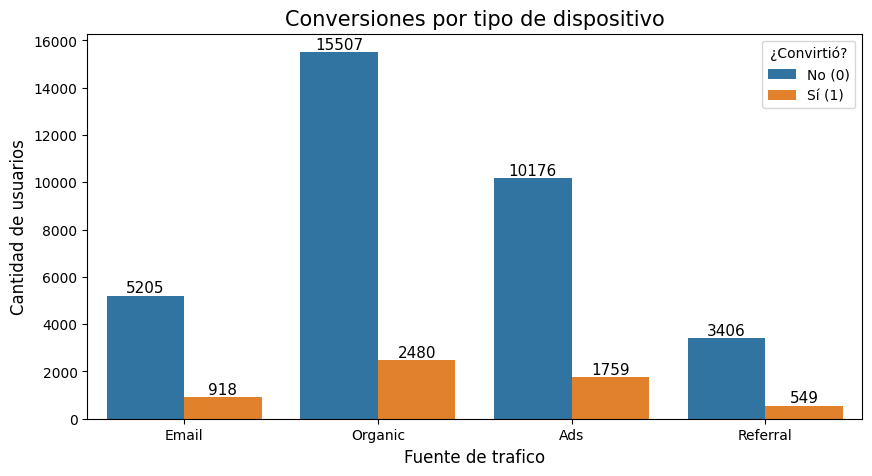

In [28]:
plt.figure(figsize=(10, 5))
ax= sns.countplot(data=df, x='traffic_source', hue='converted', palette = ["#1F77B4", "#FF7F0E"])

# Agregar valores
for bar in ax.patches:        # Recorrer todas las barras del gráfico
    height = bar.get_height() # Obtener altura de barra (conteo de usuarios)
    ax.text(x=bar.get_x()+bar.get_width() /2, # Establecer coordenada X del texto (centro de la barra)
            y=height,                         # Establecer coordenada Y del texto
            s=height,                         # Valor a mostrar
            ha='center',                      # Alinear centro del texto en coordenada
            va='bottom',                      # Alinear parte inferior del texto en coordenada
            fontsize=11)                      # Tamaño de la fuente
#Detalles
plt.title('Conversiones por tipo de dispositivo', fontsize=15)
plt.xlabel('Fuente de trafico', fontsize=12)
plt.ylabel('Cantidad de usuarios', fontsize=12)
plt.legend(title='¿Convirtió?', labels=['No (0)', 'Sí (1)'])
plt.show()


**Este gráfico muestra la cantidad de usuarios que convirtieron y no convirtieron según la fuente de trafico.**

**Observamos que Organic y Ads concentran la mayoría del volumen, mientras que Email y Referral tienen una participación mas baja.**


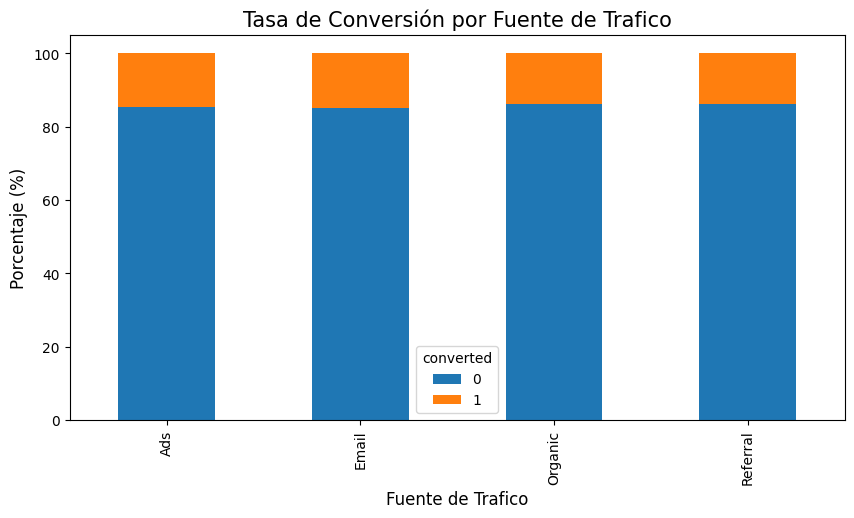

In [29]:
tabla_apilada1= pd.crosstab(df['traffic_source'], df['converted'], normalize='index')*100
tabla_apilada1.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Tasa de Conversión por Fuente de Trafico', fontsize=15)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Fuente de Trafico', fontsize=12)
plt.show()


**Este gráfico muestra la tasa de conversión por fuente de trafico independientemente del volumen total.**

**Vemos que todas las categorias cuentan con un porcentaje muy parecido.**


### Relación entre el tipo de usuario y la conversión

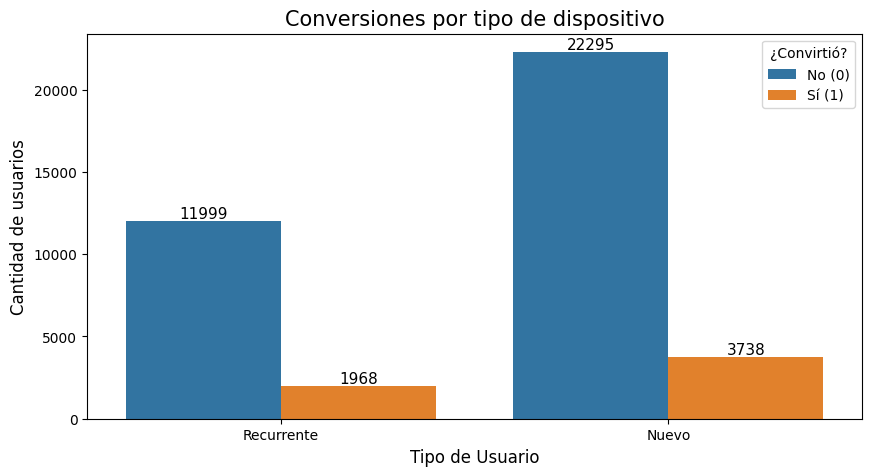

In [30]:
plt.figure(figsize=(10, 5))
ax= sns.countplot(data=df, x='user_type', hue='converted', palette = ["#1F77B4", "#FF7F0E"])

# Agregar valores
for bar in ax.patches:        # Recorrer todas las barras del gráfico
    height = bar.get_height() # Obtener altura de barra (conteo de usuarios)
    ax.text(x=bar.get_x()+bar.get_width() /2, # Establecer coordenada X del texto (centro de la barra)
            y=height,                         # Establecer coordenada Y del texto
            s=height,                         # Valor a mostrar
            ha='center',                      # Alinear centro del texto en coordenada
            va='bottom',                      # Alinear parte inferior del texto en coordenada
            fontsize=11)                      # Tamaño de la fuente
#Detalles
plt.title('Conversiones por tipo de dispositivo', fontsize=15)
plt.xlabel('Tipo de Usuario', fontsize=12)
plt.ylabel('Cantidad de usuarios', fontsize=12)
plt.legend(title='¿Convirtió?', labels=['No (0)', 'Sí (1)'])
plt.show()

**Este gráfico muestra la cantidad de usuarios que convirtieron y no convirtieron según el tipo de usuario.**

**Observamos que el usuario Nuevo concentra más volumen, mientras que el recurrente tiene una participación menor.**

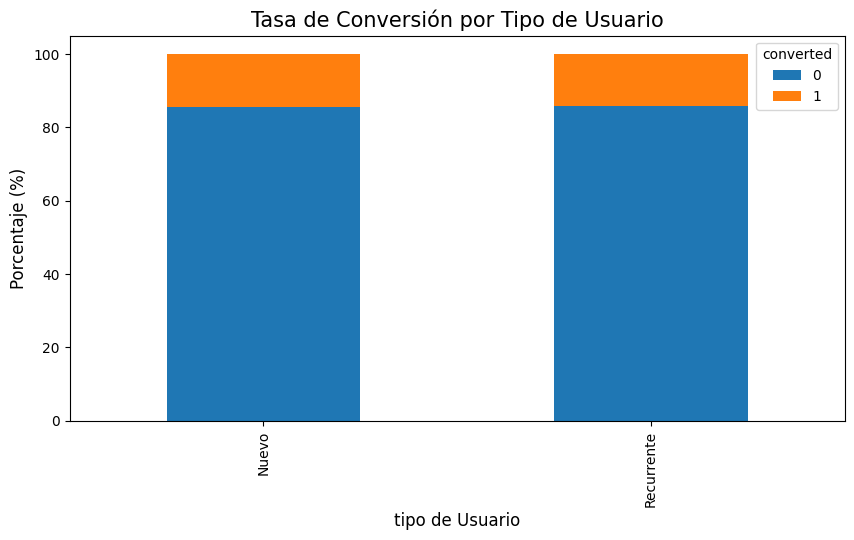

In [32]:
tabla_apilada2= pd.crosstab(df['user_type'], df['converted'], normalize='index')*100
tabla_apilada2.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Tasa de Conversión por Tipo de Usuario', fontsize=15)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('tipo de Usuario', fontsize=12)
plt.show()

**Este gráfico muestra la tasa de conversión por Tipo de Usuario.**

**Vemos que ambas categorias cuentan con un porcentaje muy parecido.**

## 🧩 Paso 7. Insight Ejecutivo para Stakeholders

Se traducen los hallazgos del análisis del experimento A/B en conclusiones accionables para el negocio, enfocadas en **versión de página, conversión, gasto promedio, canales de tráfico y tipo de usuario**.

**Preguntas a responder:**  
- ¿Qué página genera mayor conversión y gasto promedio?  
- ¿Qué canales de tráfico son más efectivos para generar conversiones?  
- ¿Existen diferencias significativas según el tipo de usuario?  
- ¿Qué recomendaciones se pueden tomar para optimizar la estrategia de marketing?


---

### 🌟 Insight Ejecutivo basado en el Experimento A/B

#### 🔍 **Comparación de página (A vs B)**  

**Gasto promedio por usuario que convirtió:**
- La media para la pagina A:  61.0865724522293
-La media para la pagina B:  68.74536005009392

**Interpretación:**
Con base en la prueba t, encontramos evidencia estadísticamente significativa de que el gasto promedio difiere entre las dos páginas, siendo la página B la que presenta un gasto promedio significativamente mayor.
<br>

**Tasa de conversión:** 
- Tasa de conversión página A: 12.57%
- Tasa de conversión página B: 15.96%

 **Interpretación:**
- Con base en un chi-square test de independencia, encontramos evidencia estadística de que la fuente de trafico y la conversion estan asociados. Los usuarios de email presentan una mayor proporcion de conversion que los demás.
---

#### 📊 **Segmentación por fuente de tráfico**
- Observamos que Organic y Ads concentran la mayoría del volumen, mientras que Email y Referral tienen una participación mas baja.

 **Interpretación:**
- Con base en un chi-square test de independencia, encontramos evidencia estadística de que la fuente de trafico y la conversion estan asociados. Los usuarios de email presentan una mayor proporcion de conversion que los demás.
 ---

#### 📊 **Segmentación por tipo de usuario**
- Ambos Tipos de usuarios cuentan con un porcentaje muy parecido.
- **Interpretación:**
Con base en un chi-square test de independencia, no encontramos evidencia estadística de el tipo de usuario y la conversion estan asociados. Esto sugiere que, en los datos analizados, ambas variables no muestran una asociación estadísticamente significativa. Cabe señalar que este resultado no prueba que las variables sean independientes, sino que los datos no son inconsistentes con esa hipótesis. Adicionalmente, este análisis no permite establecer relaciones causales ni evaluar si las diferencias observadas tienen relevancia desde una perspectiva de negocio.
---

## **Las visualizaciones usadas respaldan los resultados estadísticos de pasos anteriores.**

---

#### 💡 **Recomendaciones de negocio:** 
- Se recomienda usar la pagina B ya que reprensenta un gasto promedio mayor.
-  Recomendación aquí